# HW15

### Author: Joseph Wong

## Import Packages

In [379]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

# ML packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report

# Additional packages
from collections import Counter

## About the Data

### Import the Data

In [2]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")

print("Path to dataset files:", path)

# Note this downloads three files. We will use the second one.
file = path + '/' + os.listdir(path)[0]
df = pd.read_csv(file)
df

Path to dataset files: C:\Users\josee\.cache\kagglehub\datasets\kumarajarshi\life-expectancy-who\versions\1


Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

### Data Source

The data was collected by Kumar Rajarshi from the World Health Organization (WHO) and the United Nation website with the help of Deeksha Russell and Duan Wang. The datasets are available to the public for the purpose of health data analysis. This dataset focuses on immunization factors, mortality factors, economic factors, social factors, and other health related factors for 193 countries across the years 2000-2015.

## Exploratory Data Analysis

In [3]:
df.shape

(2938, 22)

There are 2938 observations and 22 variables.

In [4]:
# Clean up column names
df.rename(columns={'Life expectancy ': 'Life expectancy',
                   'Adult Mortality': 'Adult mortality',
                   'infant deaths': 'Infant deaths',
                   'percentage expenditure': 'Percentage expenditure',
                   'Measles ': 'Measles',
                   ' BMI ': 'BMI',
                   'under-five deaths ': 'Under-five deaths',
                   'Diphtheria ': 'Diphtheria',
                   ' HIV/AIDS': 'HIV/AIDS',
                   ' thinness  1-19 years': 'Thinness 10-19 years',
                   ' thinness 5-9 years': 'Thinness 5-9 years'}, inplace=True)
df.keys()

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 10-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

**Variable Descriptions**
- 'Status': Developed or Developing status
- 'Life expectancy': Life Expectancy in age
- 'Adult mortality': Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- 'Infant deaths': Number of Infant Deaths per 1000 population
- 'Alcohol': Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- 'Percentage expenditure': Expenditure on health as a percentage of Gross Domestic Product per capita (%)
- 'Hepatitis B': Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- 'Measles': Measles - number of reported cases per 1000 population
- 'BMI': Average Body Mass Index of entire population
- 'Under-five deaths': Number of under-five deaths per 1000 population
- 'Polio': Polio (Pol3) immunization coverage among 1-year-olds (%)
- 'Total expenditure': General government expenditure on health as a percentage of total government expenditure (%)
- 'Diphtheria': Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- 'HIV/AIDS': Deaths per 1 000 live births HIV/AIDS (0-4 years)
- 'GDP': Gross Domestic Product per capita (in USD)
- 'Thinness 10-19 years': Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- 'Thinness 5-9 years': Prevalence of thinness among children for Age 5 to 9(%)
- 'Income composition of resources': Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- 'Schooling': Number of years of Schooling (years)

*Variable descriptions are taken directly from https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who.*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

All data types appear to be what they should be, with the majority being numerical.

In [6]:
df.describe()

Year  Life expectancy  Adult mortality  Infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  Percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  Under-five deaths        Polio  Total expenditure  \
count  2904.000000        2938.000000  2919.000000         2712.00000   
mean     38.321247          42.035739    82.550188            5.93819   
std      20.044034         160.445548    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          28.000000    97.000000            7.49250   
max      87.300000        2500.000000    99.000000           17.60000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       Thinness 10-19 years  Thinness 5-9 years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

'Percentage expenditure', 'Measles', 'Under-five deaths', 'HIV/AIDS', 'Thinness 10-19 years', 'Thinness 5-9 years' may have potential outliers at its max since their means are much greater than their median. We will analyze the observations near their max to determine whether they appear to be outliers.

In [7]:
cols = ['Percentage expenditure', 'Measles', 'Under-five deaths', 'HIV/AIDS', 'Thinness 10-19 years', 'Thinness 5-9 years']
for col in cols:
    print(col)
    print(df[col].sort_values(ascending=False).head())
    print()

Percentage expenditure
2522    19479.91161
2523    19099.04506
1545    18961.34860
2525    18822.86732
2524    18379.32974
Name: Percentage expenditure, dtype: float64

Measles
1908    212183
731     182485
1907    168107
1905    141258
725     133802
Name: Measles, dtype: int64

Under-five deaths
1201    2500
1200    2400
1199    2300
1198    2200
1197    2100
Name: Under-five deaths, dtype: int64

HIV/AIDS
2501    50.6
2500    50.3
2502    49.9
2499    49.1
2503    48.8
Name: HIV/AIDS, dtype: float64

Thinness 10-19 years
1201    27.7
1200    27.5
1199    27.4
1198    27.3
1196    27.2
Name: Thinness 10-19 years, dtype: float64

Thinness 5-9 years
1201    28.6
1200    28.5
1199    28.4
1198    28.3
1197    28.2
Name: Thinness 5-9 years, dtype: float64



After further exploration, they do not appear to have outliers, since their max is close to the second highest, and third highest, and so on.

In [8]:
cols = ['Status', 'Country']
for col in cols:
    print(col)
    print(df[col].value_counts(ascending=True).head(15))
    print()

Status
Status
Developed      512
Developing    2426
Name: count, dtype: int64

Country
Country
Dominica                  1
Cook Islands              1
Niue                      1
Nauru                     1
Monaco                    1
Marshall Islands          1
Saint Kitts and Nevis     1
Palau                     1
Tuvalu                    1
San Marino                1
Bahamas                  16
Bahrain                  16
Austria                  16
Azerbaijan               16
Afghanistan              16
Name: count, dtype: int64



Upon analyzing the categorical variables, it seems that developed countries are less represented (512 observations) while developing countries are more represented (2426 observations). Additionally, there are some countries (Dominica, Cook Islands, Niue, Nauru, Monaco, Marshall Islands, Saint Kitts and Nevis, Palau, Tuvalu, San Marino) that only have 1 observations, while the rest have 16 observations.

In [9]:
countries = ['Dominica', 'Cook Islands', 'Niue', 'Nauru', 'Monaco', 'Marshall Islands', 'Saint Kitts and Nevis', 'Palau', 'Tuvalu', 'San Marino']
df[df['Country'].isin(countries)]

Country  Year      Status  Life expectancy  \
624            Cook Islands  2013  Developing              NaN   
769                Dominica  2013  Developing              NaN   
1650       Marshall Islands  2013  Developing              NaN   
1715                 Monaco  2013  Developing              NaN   
1812                  Nauru  2013  Developing              NaN   
1909                   Niue  2013  Developing              NaN   
1958                  Palau  2013  Developing              NaN   
2167  Saint Kitts and Nevis  2013  Developing              NaN   
2216             San Marino  2013  Developing              NaN   
2713                 Tuvalu  2013  Developing              NaN   

      Adult mortality  Infant deaths  Alcohol  Percentage expenditure  \
624               NaN              0     0.01                0.000000   
769               NaN              0     0.01               11.419555   
1650              NaN              0     0.01              871.878317   
1715              NaN              0     0.01                0.000000   
1812              NaN              0     0.01               15.606596   
1909              NaN              0     0.01                0.000000   
1958              NaN              0      NaN              344.690631   
2167              NaN              0     8.54                0.000000   
2216              NaN              0     0.01                0.000000   
2713              NaN              0     0.01               78.281203   

      Hepatitis B  Measles  ...  Polio  Total expenditure  Diphtheria  \
624          98.0        0  ...   98.0               3.58        98.0   
769          96.0        0  ...   96.0               5.58        96.0   
1650          8.0        0  ...   79.0              17.24        79.0   
1715         99.0        0  ...   99.0               4.30        99.0   
1812         87.0        0  ...   87.0               4.65        87.0   
1909         99.0        0  ...   99.0               7.20        99.0   
1958         99.0        0  ...   99.0               9.27        99.0   
2167         97.0        0  ...   96.0               6.14        96.0   
2216         69.0        0  ...   69.0               6.50        69.0   
2713          9.0        0  ...    9.0              16.61         9.0   

      HIV/AIDS          GDP  Population  Thinness 10-19 years  \
624        0.1          NaN         NaN                   0.1   
769        0.1   722.756650         NaN                   2.7   
1650       0.1  3617.752354         NaN                   0.1   
1715       0.1          NaN         NaN                   NaN   
1812       0.1   136.183210         NaN                   0.1   
1909       0.1          NaN         NaN                   0.1   
1958       0.1  1932.122370       292.0                   0.1   
2167       0.1          NaN         NaN                   3.7   
2216       0.1          NaN         NaN                   NaN   
2713       0.1  3542.135890      1819.0                   0.2   

      Thinness 5-9 years  Income composition of resources  Schooling  
624                  0.1                              NaN        NaN  
769                  2.6                            0.721       12.7  
1650                 0.1                              NaN        0.0  
1715                 NaN                              NaN        NaN  
1812                 0.1                              NaN        9.6  
1909                 0.1                              NaN        NaN  
1958                 0.1                            0.779       14.2  
2167                 3.6                            0.749       13.4  
2216                 NaN                              NaN       15.1  
2713                 0.1                              NaN        0.0  

[10 rows x 22 columns]

Upon further observation, we see that these 10 underrepresented countries have NaNs in the 'Life expectancy' column and only contain data for 2013. We will drop these rows because the variable we are predicting ('Life expectancy') cannot have any NaNs. This should not significantly misrepresent the dataset because 10 observations is a small percentage of the total observations. We should make note that these countries are no longer represented in the dataset at all.

In [44]:
df = df[df['Life expectancy'].notna()]
df.isna().sum().sort_values()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult mortality                      0
Infant deaths                        0
Percentage expenditure               0
Measles                              0
HIV/AIDS                             0
Under-five deaths                    0
Diphtheria                          19
Polio                               19
BMI                                 32
Thinness 5-9 years                  32
Thinness 10-19 years                32
Schooling                          160
Income composition of resources    160
Alcohol                            193
Total expenditure                  226
GDP                                443
Hepatitis B                        553
Population                         644
dtype: int64

There is a decently large number of NaNs for 'Population', 'Hepatitis B', 'GDP', and 'Total expenditure'. We will be cautious about using these variables because they may be misrepresentative of the dataset.

In [12]:
Counter(df[df['Diphtheria'].isna()].index == df[df['Polio'].isna()].index)

Counter({np.True_: 19})

In [15]:
Counter(df[df['BMI'].isna()].index == df[df['Thinness 5-9 years'].isna()].index)

Counter({np.True_: 32})

In [16]:
Counter(df[df['Thinness 5-9 years'].isna()].index == df[df['Thinness 10-19 years'].isna()].index)

Counter({np.True_: 32})

In [17]:
Counter(df[df['Schooling'].isna()].index == df[df['Income composition of resources'].isna()].index)

Counter({np.True_: 160})

By analyzing what observations contain NaNs for specific variables, we can determine that variables with the same number of NaNs will have the same observations that contain NaNs. That is, there are 19 observations with NaNs in both 'Diptheria' and 'Polio', 32 in 'BMI', 'Thinness 5-9 years', and 'Thinness 10-19 years', and 160 in both 'Schooling' and 'Income composition of resources'. We will now analyze variables with fewer than 200 NaNs to see if we can drop the observations.

In [38]:
df[df['Polio'].isna() | df['BMI'].isna() | df['Schooling'].isna() | df['Alcohol'].isna()].shape

(366, 22)

There are 366 observations that we will potentially be dropping. As a reminder, there are 2938 observations left in the data set after dropping the NaNs from the 'Life expectancy' column. So, we will check what observations we are dropping to see how the new dataset may be biased.

In [30]:
# this will select the columns with fewer than 200 NaNs
print(df[df['Polio'].isna() | df['BMI'].isna() | df['Schooling'].isna() | df['Alcohol'].isna()]['Year'].value_counts())
print()
print(df[df['Polio'].isna() | df['BMI'].isna() | df['Schooling'].isna() | df['Alcohol'].isna()]['Status'].value_counts())
print()
print(df[df['Polio'].isna() | df['BMI'].isna() | df['Schooling'].isna() | df['Alcohol'].isna()]['Country'].value_counts().head(20))

Year
2015    178
2001     14
2000     14
2004     13
2005     13
2002     13
2003     13
2014     12
2008     12
2009     12
2010     12
2011     12
2012     12
2013     12
2007     12
2006     12
Name: count, dtype: int64

Status
Developing    292
Developed      74
Name: count, dtype: int64

Country
Democratic Republic of the Congo                        16
Côte d'Ivoire                                           16
Czechia                                                 16
Democratic People's Republic of Korea                   16
South Sudan                                             16
Somalia                                                 16
United Republic of Tanzania                             16
United States of America                                16
United Kingdom of Great Britain and Northern Ireland    16
Sudan                                                   16
Republic of Korea                                       16
Republic of Moldova                              

In [46]:
df = df[df['BMI'].notna()]
df = df[df['Polio'].notna() & df['BMI'].notna() & df['Schooling'].notna() & df['Alcohol'].notna()]
df.isna().sum().sort_values()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult mortality                      0
Infant deaths                        0
Alcohol                              0
Percentage expenditure               0
Measles                              0
BMI                                  0
Under-five deaths                    0
Polio                                0
HIV/AIDS                             0
Diphtheria                           0
Thinness 10-19 years                 0
Thinness 5-9 years                   0
Schooling                            0
Income composition of resources      0
Total expenditure                    6
GDP                                258
Population                         455
Hepatitis B                        474
dtype: int64

In [47]:
df.shape

(2562, 22)

Many of the observations we dropped are from 2015 and most are developing countries. 74 are developed, which is rather large considering there are only 512 observations in the dataset that are developed. The following countries have been dropped completely by removing these NaNs: Democratic Republic of the Congo, Côte d'Ivoire, Czechia, Democratic People's Republic of Korea, South Sudan, Somalia, United Republic of Tanzania, United States of America, United Kingdom of Great Britain and Northern Ireland, Sudan, Republic of Korea, Republic of Moldova. These are all important things to note when analyzing the dataset because it may lead to misrepresentation of data from 2015 and developed countries.

Only 'Hepatitis B', 'Population', 'GDP', and 'Total expenditure' are left with NaNs.

*There are now 2562 observations in the dataset.*

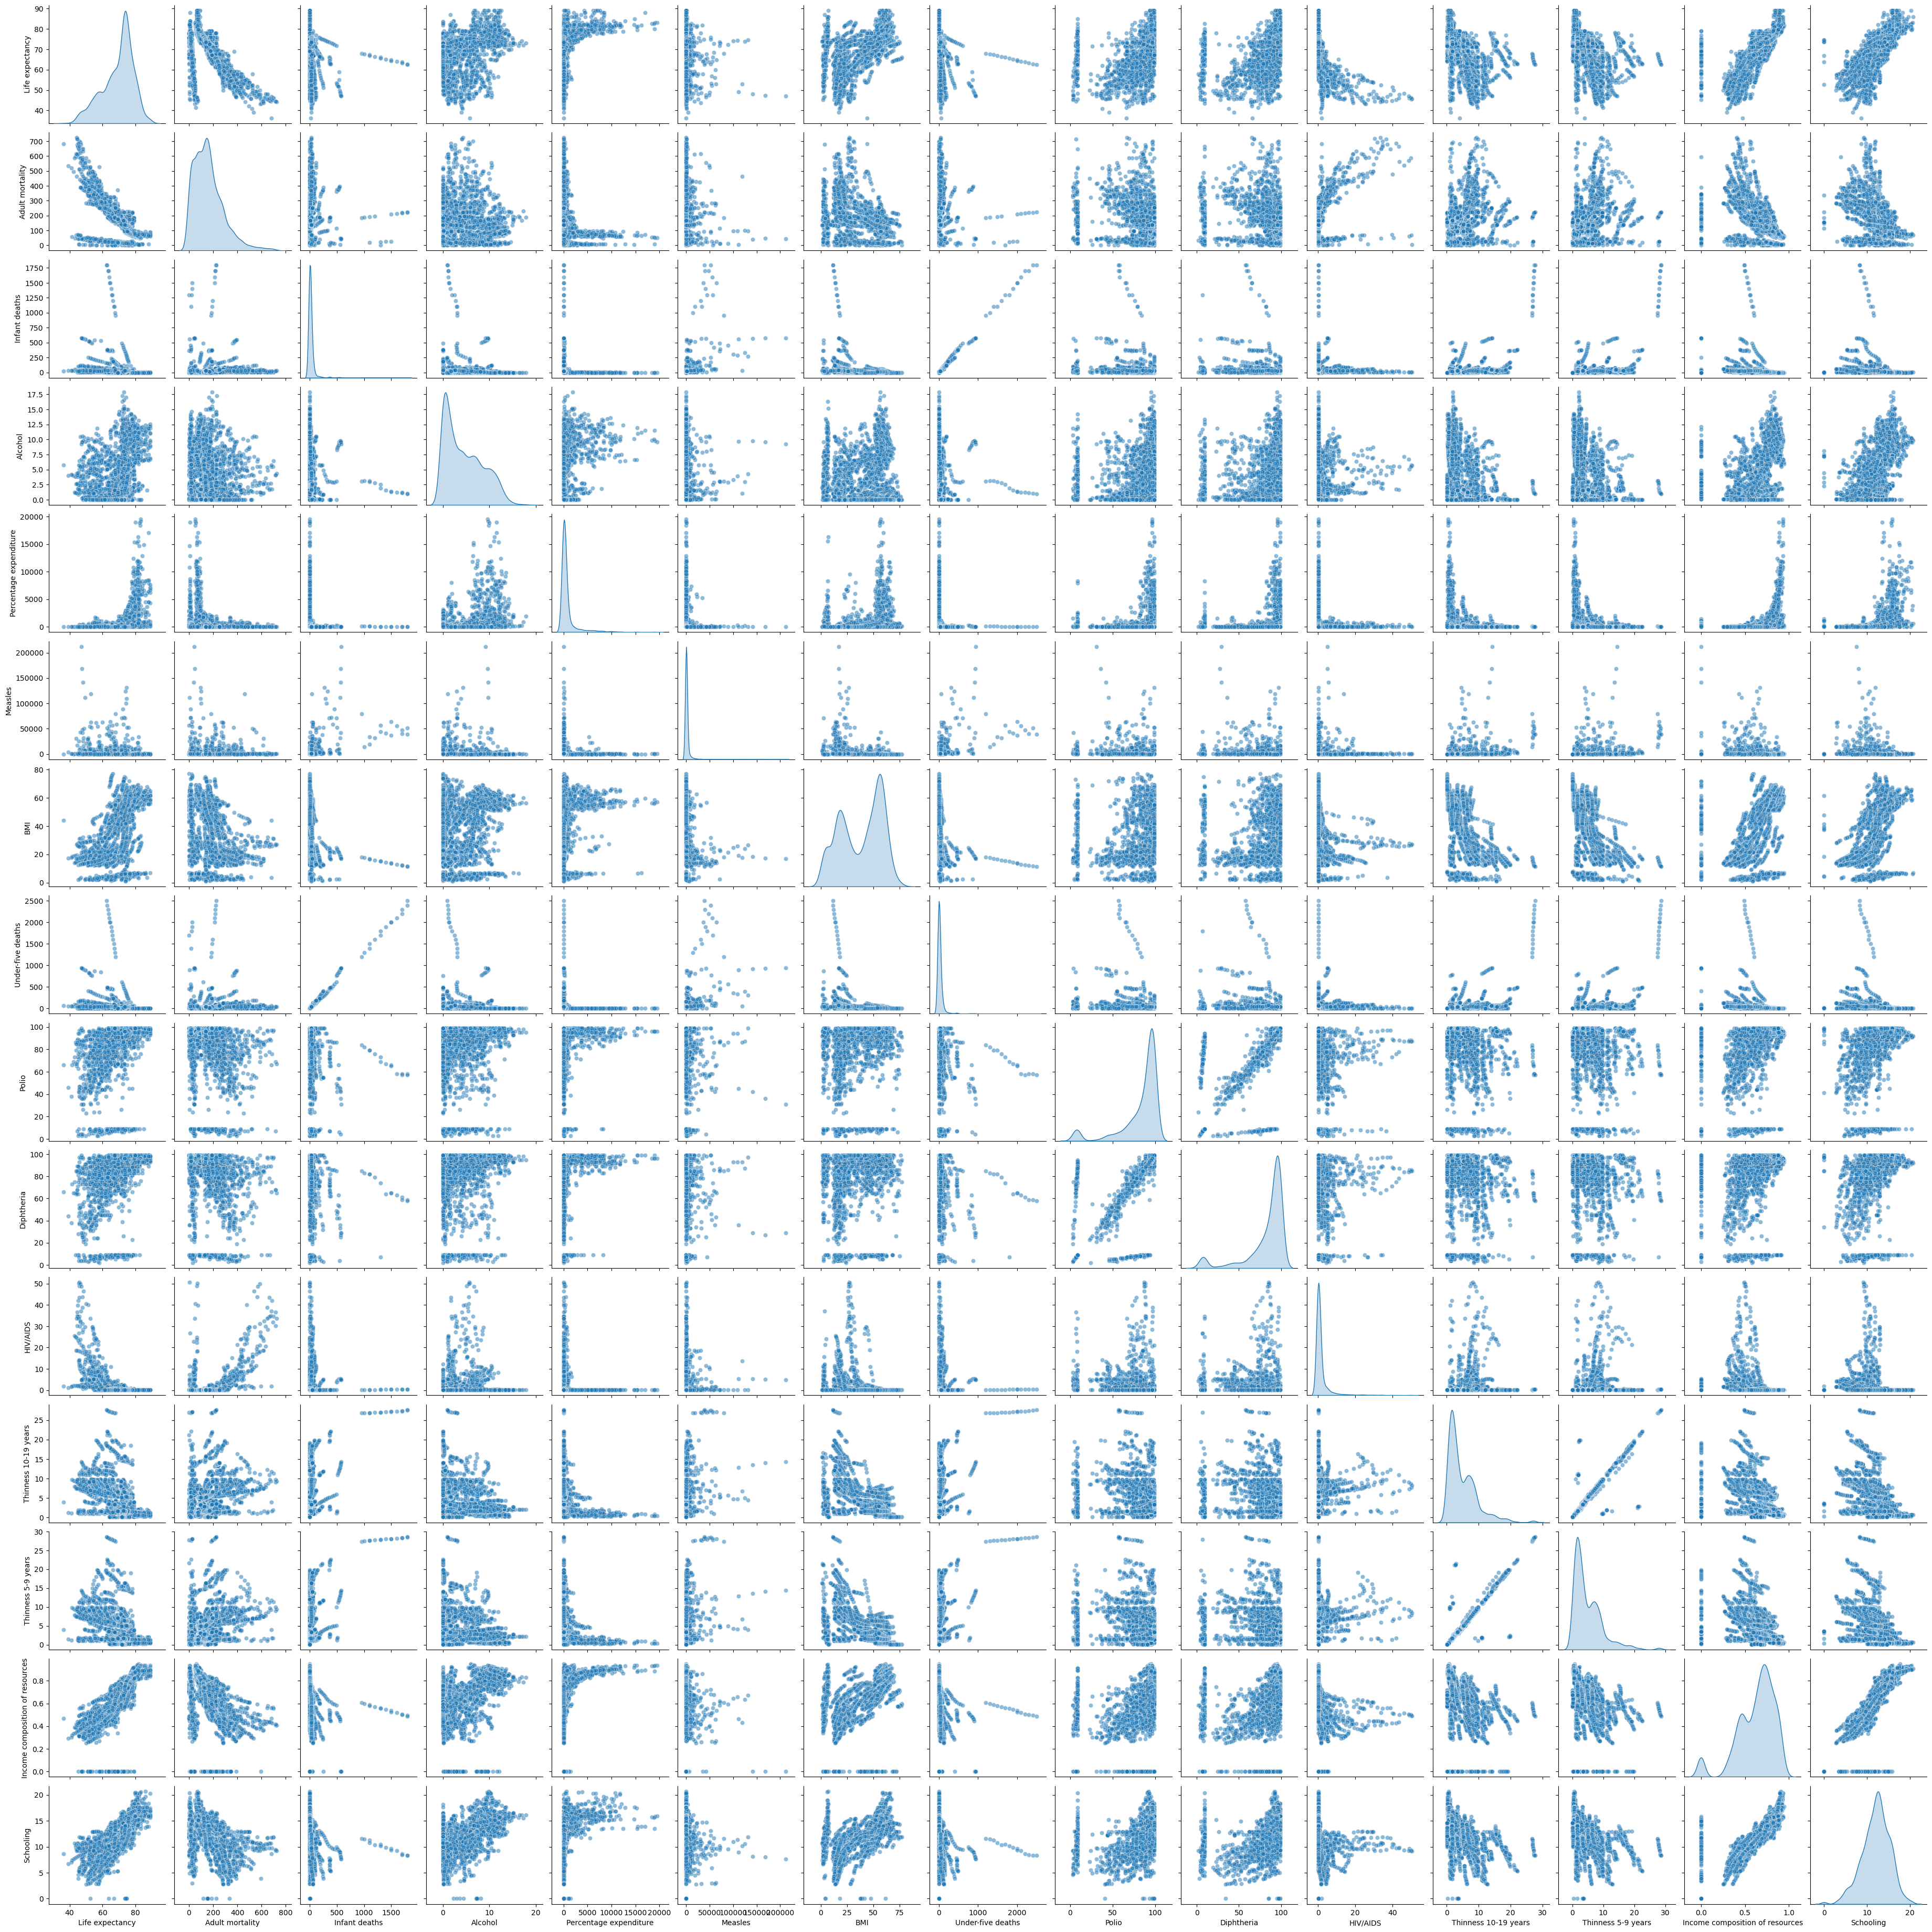

In [156]:
# all variables except 'Country', 'Year', 'Status', because they are categorical or irrelevent
# also excludes 'Hepatitis B', 'Population', 'GDP', 'Total expenditure' because they contain NaNs
cols = ['Life expectancy', 'Adult mortality', 'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'Thinness 10-19 years', 'Thinness 5-9 years', 'Income composition of resources', 'Schooling']
sns.pairplot(df[cols], diag_kind="kde", plot_kws={"alpha": 0.5})
plt.show()

The pairplot suggests 'Life expectancy' potentially has a linear correlation with 'Income composition of resources' and 'Schooling'. There may also be a non-linear relationship with 'Adult mortality', 'Percentage expenditure', 'BMI', and 'HIV/AIDS'. We will explore these potential correlations when building our model to use the most effective features.

## Test Train Validate Split

In [425]:
x_cols = ['Adult mortality', 'BMI', 'HIV/AIDS', 'Income composition of resources', 'Schooling']
y_cols = ['Life expectancy']

X = df[x_cols]
y = df[y_cols]

# First split: hold out test data
random_seed = 16
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Second split: create a validation set from the testing data
X_test, X_val, y_test, y_val = train_test_split(X_test_full, y_test_full, test_size=0.5, random_state=random_seed)
# (Hold out data so that final proportions are 80% train / 10% val / 10% test)

print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")

Train: 2049, Validation: 257, Test: 256


## Model Without Regularization

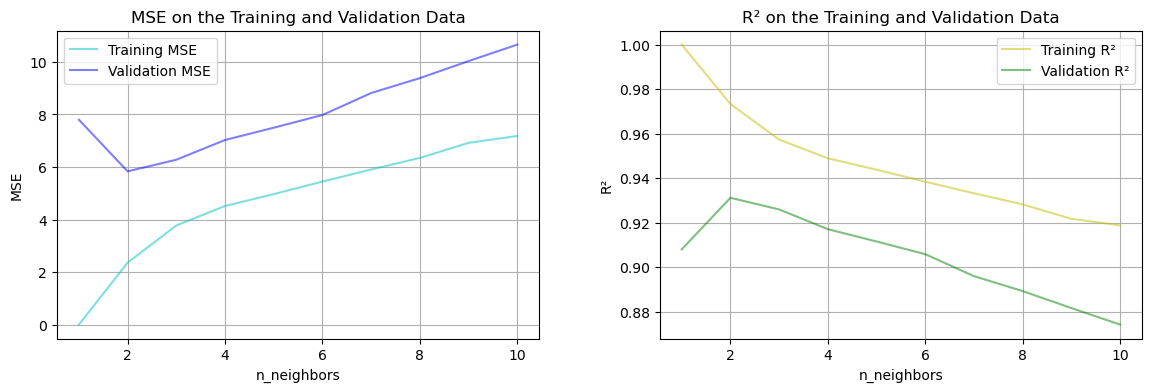

In [426]:
# Polynomial Features
degree = 2
poly = PolynomialFeatures(degree=degree,include_bias=False)
# transform the train, validation, and test sets
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

mses_train = []
r2s_train = []
mses_val = []
r2s_val = []

k_vals = range(1,11)

for k in k_vals:
    # build and fit the model
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_poly,y_train)

    # train
    y_pred_train = model.predict(X_train_poly)
    mses_train.append(mean_squared_error(y_train,y_pred_train))
    r2s_train.append(r2_score(y_train,y_pred_train))

    # validation
    y_pred_val = model.predict(X_val_poly)
    mses_val.append(mean_squared_error(y_val,y_pred_val))
    r2s_val.append(r2_score(y_val,y_pred_val))

# plot the results
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(k_vals,mses_train,'c',alpha=.5,label='Training MSE')
ax1.plot(k_vals,mses_val,'b',alpha=.5,label='Validation MSE')
ax1.grid()
ax1.legend()
ax1.set_title('MSE on the Training and Validation Data')
ax1.set_xlabel('n_neighbors')
ax1.set_ylabel('MSE')

ax2.plot(k_vals,r2s_train,'y',alpha=.5,label='Training R²')
ax2.plot(k_vals,r2s_val,'g',alpha=.5,label='Validation R²')
ax2.grid()
ax2.legend()
ax2.set_title('R² on the Training and Validation Data')
ax2.set_xlabel('n_neighbors')
ax2.set_ylabel('R²')

plt.subplots_adjust(wspace=.25)
plt.show()

It appears that validation MSE and R² are optimized at 2 neighbors while training MSE and R² are optimized at 1 neighbor. We will choose 2 neighbors because we want to avoid overfitting and aim to create a model that can make predictions accurately based on new data.

In [427]:
# build and fit the model
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train_poly,y_train)

# test
y_pred_test = model.predict(X_test_poly)
mse_test = mean_squared_error(y_test,y_pred_test)
r2_test = r2_score(y_test,y_pred_test)
print(f"MSE on testing data: {mse_test:.3f}")
print(f"RMSE on testing data: {mse_test**0.5:.3f}")
print(f"R² on testing data: {r2_test:.3f}")
print()

print("STD: " + str(df['Life expectancy'].std()))

MSE on testing data: 5.576
RMSE on testing data: 2.361
R² on testing data: 0.939

STD: 9.397863876043631


In this k-nearest neighbors regressor model, we are using 'Adult mortality', 'BMI', 'HIV/AIDS', 'Income composition of resources', 'Schooling' as 2nd degree polynomial features to predict 'Life expectancy'. The model appears to be fairly predictive, with R² of 0.939 and MSE of 5.576. Since the RMSE is rather smaller compared to the standard deviation of 'Life expectancy' reveals that the model's predictions are fairly close to the actual values. Overall, this model is able to predict 'Life expectancy' fairly well.

## Model With Regularization

In [428]:
# Define the Scalar
scaler = StandardScaler()

# Find mu and sigma using your training data
# Also transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# transform the validation set
X_val_scaled = scaler.transform(X_val)
# transform the test set
X_test_scaled = scaler.transform(X_test)

In [429]:
# Look at the max and min values for each feature
pd.DataFrame(X_train_scaled,columns=x_cols).agg(['max', 'min'])

Adult mortality       BMI  HIV/AIDS  Income composition of resources  \
max         4.522444  1.953026  9.283944                         1.516791   
min        -1.291229 -1.854209 -0.330089                        -3.009848   

     Schooling  
max   2.659842  
min  -3.734968


Model Performance:


MSE Train   MSE Val  R² Train    R² Val
alpha = 0.0                   9.088779  9.533445  0.897160  0.887485
alpha = 0.1                   9.088781  9.532131  0.897160  0.887500
alpha = 0.2                   9.088786  9.530822  0.897160  0.887516
alpha = 0.30000000000000004   9.088795  9.529519  0.897160  0.887531
alpha = 0.4                   9.088808  9.528222  0.897160  0.887546
...                                ...       ...       ...       ...
alpha = 99.5                  9.555712  9.275308  0.891877  0.890531
alpha = 99.60000000000001     9.556228  9.275420  0.891871  0.890530
alpha = 99.7                  9.556744  9.275531  0.891865  0.890529
alpha = 99.80000000000001     9.557260  9.275643  0.891859  0.890527
alpha = 99.9                  9.557775  9.275755  0.891854  0.890526

[1000 rows x 4 columns]

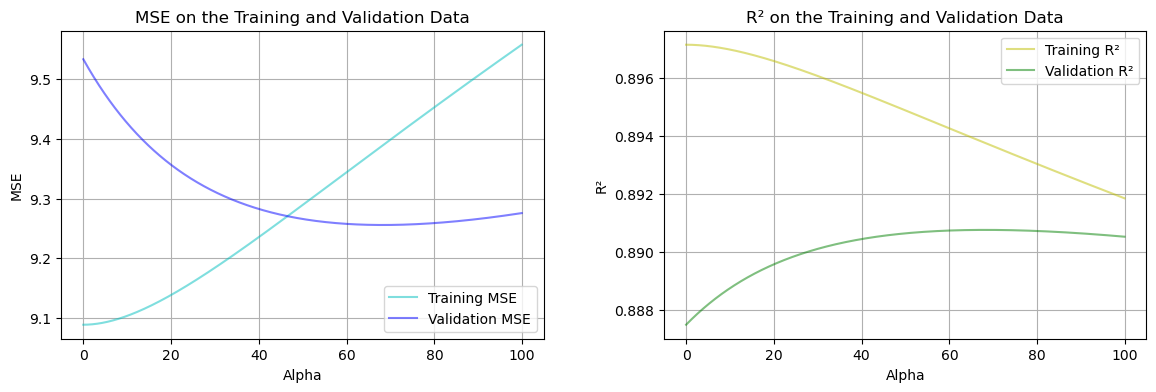

In [436]:
# Poly Features - choose the order of your polynomial
degree = 2
poly = PolynomialFeatures(degree=degree,include_bias=False)
# transform the train, validation, and test sets
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

alpha_vals = np.arange(0,100,.1)
results = {}

for a in alpha_vals:

    if a == 0:
        model = LinearRegression()
    else:
        model = Ridge(alpha=a)
    model.fit(X_train_poly, y_train)

    y_pred_train = model.predict(X_train_poly)
    y_pred_val = model.predict(X_val_poly)
    results[f"alpha = {a}"] = {
        "MSE Train": mean_squared_error(y_train, y_pred_train),
        "MSE Val": mean_squared_error(y_val, y_pred_val),
        "R² Train": r2_score(y_train, y_pred_train),
        "R² Val": r2_score(y_val, y_pred_val)
    }

results_df = pd.DataFrame(results).T
print("\nModel Performance:")
display(results_df)

# plot the results
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(alpha_vals,results_df['MSE Train'],'c',alpha=.5,label='Training MSE')
ax1.plot(alpha_vals,results_df['MSE Val'],'b',alpha=.5,label='Validation MSE')
ax1.grid()
ax1.legend()
ax1.set_title('MSE on the Training and Validation Data')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('MSE')

ax2.plot(alpha_vals,results_df['R² Train'],'y',alpha=.5,label='Training R²')
ax2.plot(alpha_vals,results_df['R² Val'],'g',alpha=.5,label='Validation R²')
ax2.grid()
ax2.legend()
ax2.set_title('R² on the Training and Validation Data')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('R²')

plt.subplots_adjust(wspace=.25)
plt.show()

It appears that validation MSE and R² flatline (more the most part) around alpha = 60. This is suitable for the training data as well, as the MSE and R² are close to the validation data statistics. This will help us to not overfit the model. So, we will use an alpha of 60 to build the ridge model.

In [437]:
# build and fit the model
model = Ridge(alpha=60)
model.fit(X_train_poly,y_train)

# test
y_pred_test = model.predict(X_test_poly)
mse_test = mean_squared_error(y_test,y_pred_test)
r2_test = r2_score(y_test,y_pred_test)
print(f"MSE on testing data: {mse_test:.3f}")
print(f"RMSE on testing data: {mse_test**0.5:.3f}")
print(f"R² on testing data: {r2_test:.3f}")
print()

print("STD: " + str(df['Life expectancy'].std()))

MSE on testing data: 8.684
RMSE on testing data: 2.947
R² on testing data: 0.904

STD: 9.397863876043631


In this ridge regressor model with alpha 60, we are using 'Adult mortality', 'BMI', 'HIV/AIDS', 'Income composition of resources', 'Schooling' as 2nd degree polynomial features to predict 'Life expectancy'. The model appears to be fairly predictive, with R² of 0.904 and MSE of 8.684. Since the RMSE is rather smaller compared to the standard deviation of 'Life expectancy' reveals that the model's predictions are fairly close to the actual values. Overall, this model is able to predict 'Life expectancy' decently well, although not as well as the k-nearest neighbors model.

## Conclusion

Between the k-nearest neighbors regressor model and the ridge regressor model with alpha 60, the k-nearest neighbors regressor model was a better predictor. Regularization is supposed to increase bias to decrease variance (avoid overfitting), improving performance on new data (i.e. generalizing). In this case, the regularized model performed worse with new data compared to the non-regularized one. This may be because the non-regularized model did not appear to have much overfitting. However, both models had R² greater than 0.9, which suggests they both are fairly effective at predicting 'Adult mortality'.